

# Investigate a Dataset - [factors affecting attendace of patients in hospitals]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>According to the data we have on more than 100,000 patients in Brazil hospitals from different hospitals to see what are the connection between the vaious factors affecting the attendance of patients on time 
This project was done by me with the help of my firends taking the same course with me but we work seperately and only aggrees on the main methods not we wrote them everyone on his own


### Question(s) for Analysis
> Looking at the data provided we can ask some question to see if the diffrent factors affect the attendance like <br>
Does recieving an SMS increase the attendance rate?<br>
How are Age and Gender affect attendace of patients? <br>
What is the rates of attendance form different locations?<br?
Does having a cronic disease or handicap make them come or not?<br>

> we are using Pandas and numpy to use the math and statsistical tools and matplotlib as the graph tools 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importing the matplotlib 
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Here we will open the file and start to make some inferes from the data and see what will be helpful and drop the useless data <br>
Then we can start the analytics and stats part and see the over view 

In [3]:
#Opening the CommaSeperatedValues File and storing it in df
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
# displaying the first 5 rows to see have an overview about the data 
df.head() 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> We start to see the data affecting us most and clean the rest 
<br> First we can see the duplicated rows and get a general view about the numbers to see the what really matters 
 

In [4]:
sum(df.duplicated()) # to get the number of duplicated rows which was 0 
df.info() # to get a deeper view of the data  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> we can see the data don't have nan values or duplicated rows so we will start dropping and modifing 

In [5]:
# droping the colums we will not use 
df.drop(['PatientId','AppointmentID'],1,inplace = True)
df.describe()# to get a deeper view of the number 

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Age minmum was -1 which was appslotly an error 
df = df[df.Age>=0]
df['interval'] = pd.to_datetime(df['AppointmentDay'])-pd.to_datetime(df['ScheduledDay'])# used it from Stackoverflow to calculate the time interval
df.drop(['ScheduledDay','AppointmentDay'],1,inplace = True)#drop the unused colums 

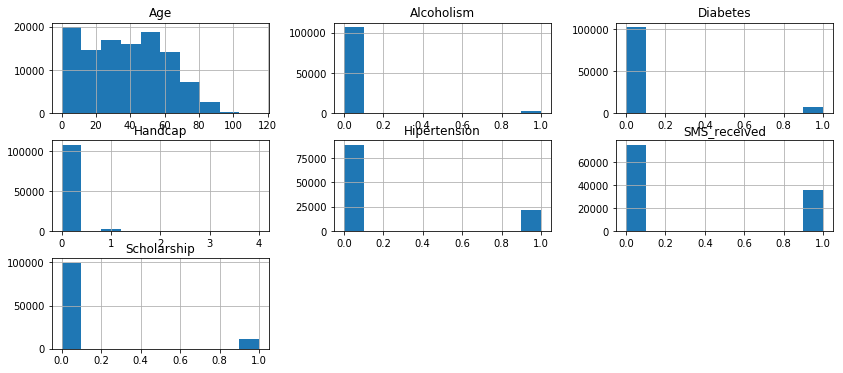

In [7]:
df.hist(figsize=(14,6));# to get a deeper view of the data 

> we can see that a small portion of the patients have cronic desiese or handicap and some other inferes 

<a id='eda'></a>
## Exploratory Data Analysis

> we will explore the data in 2 ways the graphs and the precents of the patients 

> we will see it variable to variable throught the age, gender .....


### Research Question 1 (Does the Age or gender affect the attendance )

In [8]:
df['No-show'].value_counts()# getting the total number of interies to start counting 
print('we have a attending precent of {}% \nwe will see them in deeper view '.format(88207/(88207+22319)*100))

we have a attending precent of 79.80656135208005% 
we will see them in deeper view 


#### Starting by making function to plot the graph of the change and see what we can infere 

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


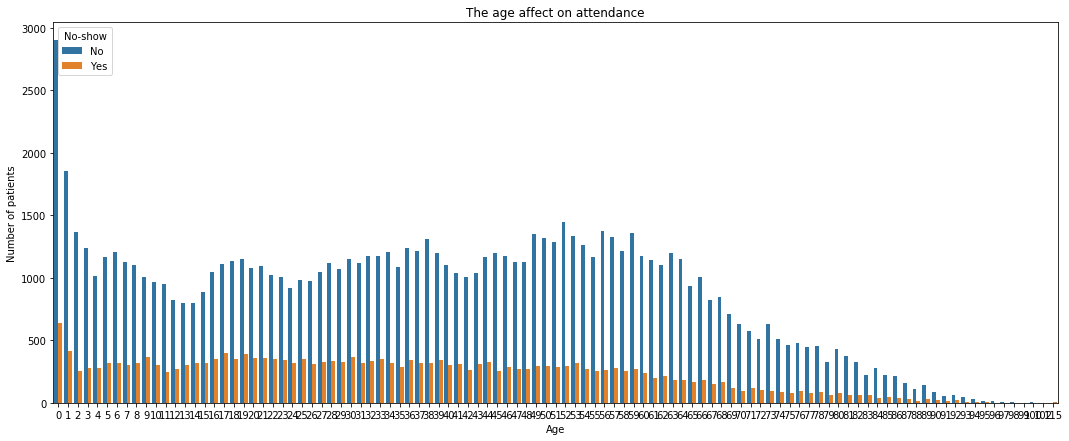

In [9]:
# creating a function to display the results faster and not to have to rewrite it 
def graph_calculate(aspect , title):
    plt.figure(figsize =(18,7))
    f = sns.countplot(x=aspect,hue = df['No-show'])
    plt.title(title)#to enter the title
    plt.ylabel('Number of patients')
    plt.show
    print(aspect.value_counts())# to print some number about the graph 
graph_calculate(df.Age,'The age affect on attendance')


> we can see that the highest precent of the pationts was in early age but it seems that the precent of attednace is almost the same except the first year but overall it seems there is <b>NO</b> clear relation

### Second Question : Diseases and attendance 
> Is there a clear relation between people who suffer from any thing and be more precise 

0    102583
1      7943
Name: Diabetes, dtype: int64


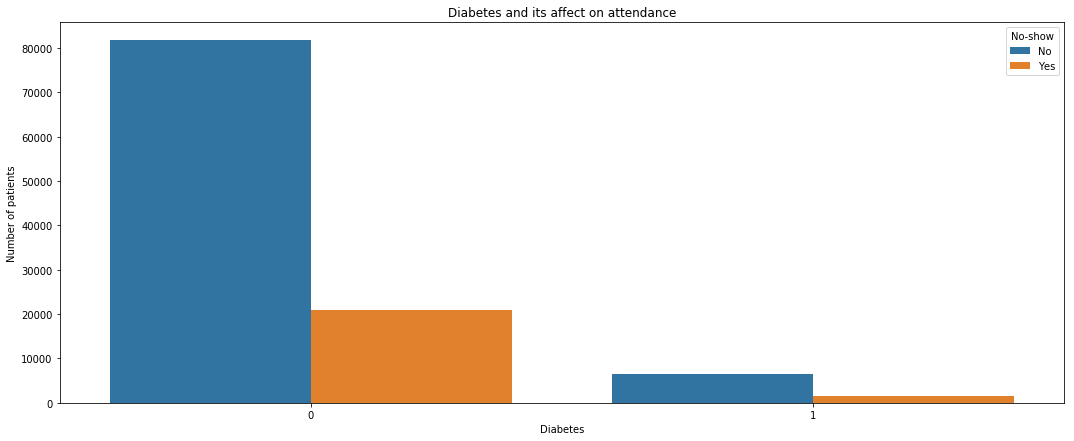

In [10]:
graph_calculate(df.Diabetes,'Diabetes and its affect on attendance')

0    88725
1    21801
Name: Hipertension, dtype: int64


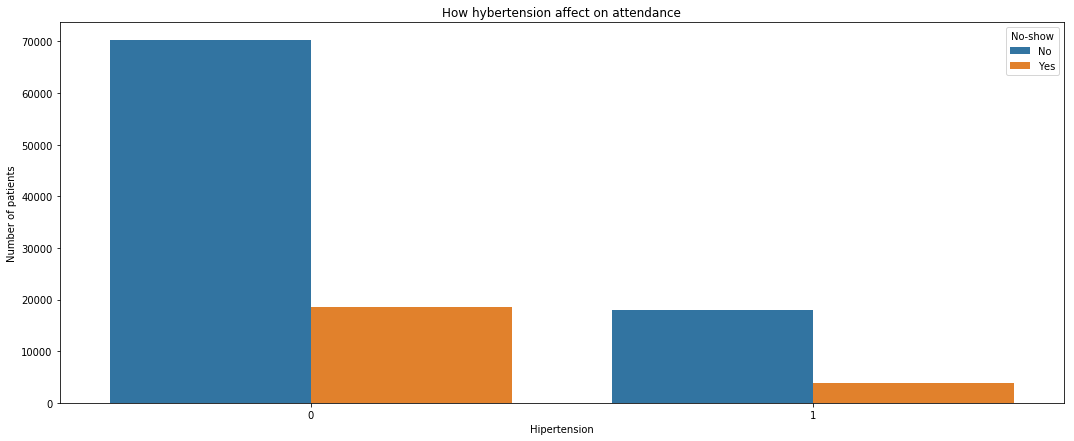

In [11]:
graph_calculate(df.Hipertension,'How hybertension affect on attendance')

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


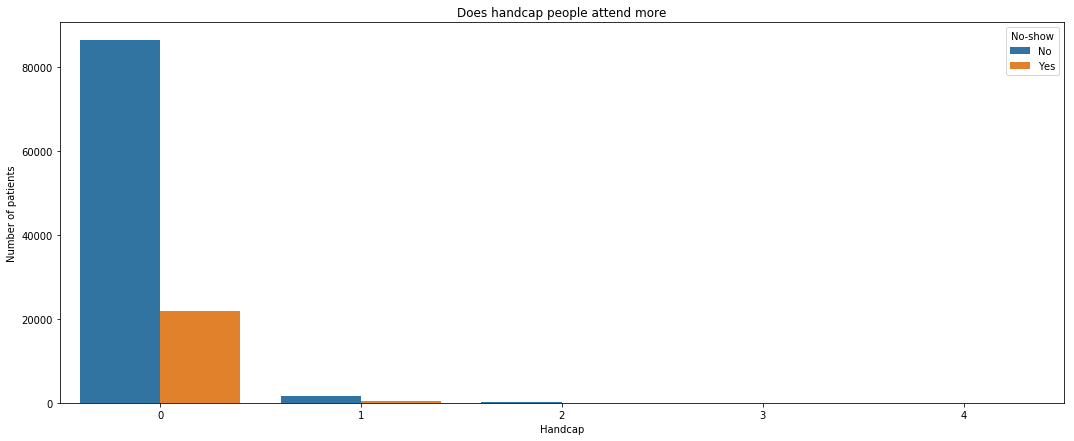

In [12]:
graph_calculate(df.Handcap,'Does handcap people attend more')

## After investigating the diseases data can say that 
> we can see that the makority of patients don't suffer from a cronic diseases and I have made some more investigation with the mean and mode of some values to get to this infere<br>
we can see that the attendance rate in people who are safe range form 78 , 81 and 83 % of the people who have hypertension ,Alcoholism and diabetes and the sound people range from 81 to 85% in other disabilties but it is almost the same with <b>No</b> clear corelation <br>also in the handcap people so it is not affecting any thing 

### Research Question   (Scholarship, SMS and interval) 
> Is there a relationhsip between the scholarshipand time interval between the time of day and schdeuld day and we will see the sms

0    75044
1    35482
Name: SMS_received, dtype: int64


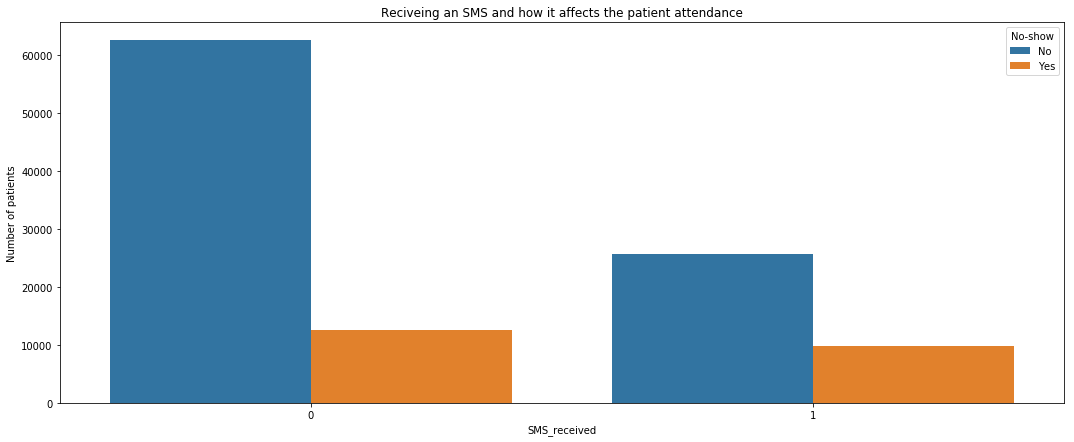

In [13]:
graph_calculate(df.SMS_received,'Reciveing an SMS and how it affects the patient attendance')

0    99665
1    10861
Name: Scholarship, dtype: int64


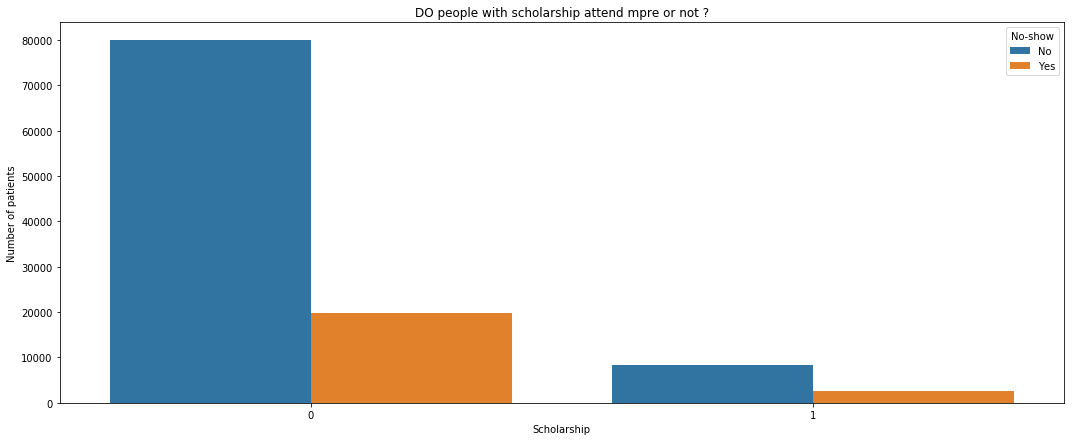

In [14]:
graph_calculate(df.Scholarship,'DO people with scholarship attend mpre or not ?')

### I put these two colums in section 
> Because it seems there is a relation between recieving an SMS show more in time and also the scholarship may be some wired to see the percent of the people who do not have scholarship more than people who have 

### How neighbourhood affects the Attendance 

Text(0.5,1,'How Neigbourhood and attendace are related')

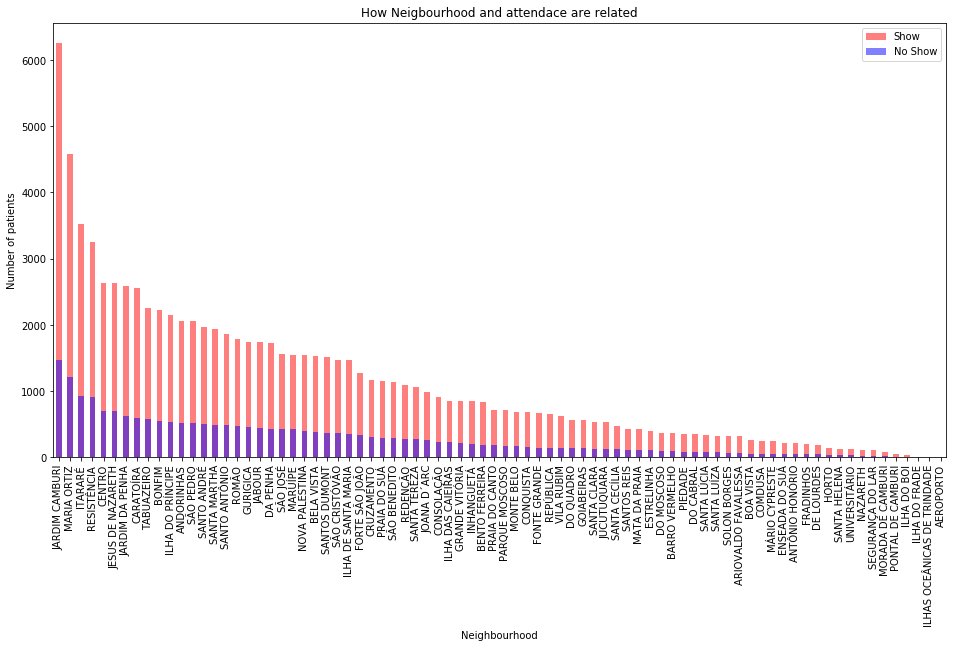

In [15]:
plt.figure(figsize=(16,8))
df.Neighbourhood[df['No-show']=='No'].value_counts().plot (kind ='bar',color = 'red',alpha = .5 ,label = 'Show')
df.Neighbourhood[df['No-show']=='Yes'].value_counts().plot(kind ='bar',color = 'blue',alpha = .5 ,label = 'No Show')
plt.legend()
plt.xlabel("Neighbourhood")
plt.ylabel('Number of patients')
plt.title("How Neigbourhood and attendace are related")

>It have a clear effect but i would say it is just because some neighbourhoods have more people and maybe the richer the neighbourhoods take care more about their health and show more in time but there is no clear evidence  

<a id='conclusions'></a>
## Conclusions

> I have stated the results in after every section of data and see what is the relation but to conclude there is no clear relation between the diseases, Age, the gender or time <br>
But we can see a relation but not that clear between the SMS and having a scholarship and we see a diverse neighbourhoods and their realtion and numbers


### Limitations
> we can see that some data do not show clear relation and other data like the history and level of income can be provided will be better <br>
we can not draw a relation for some of the variables and maybe some more data to draw better conclusions

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0